# 0- Imports

In [67]:
!pip install pandas plotly wordcloud numpy scikit-learn seaborn matplotlib joblib vaderSentiment nltk requests beautifulsoup4

DEPRECATION: Loading egg at c:\users\mohamed khalaf\appdata\local\programs\python\python312\lib\site-packages\beautifulsoup4-4.1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
import pandas as pd
import re
from sklearn.impute import KNNImputer
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
import numpy as np
import plotly.figure_factory as ff
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import learning_curve
import joblib
from sklearn.metrics import roc_auc_score, make_scorer
from plotly.subplots import make_subplots
from IPython.display import display, clear_output
import time
from sklearn.model_selection import ParameterGrid
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import requests as rq
from bs4 import BeautifulSoup


# 1- SCRAPPING THE DATASET

### THIS CODE IS USED TO SCRAP THE DATA THEN PUT IT IN A CSV FILE SO DON'T RUN IT !!!!

In [69]:

# global rating, Aircraft, Class, Travel_type, Route, Date, comfort, staff, food, entertainment, wifi, ground_service, vfm, recommend

# verified = []
# rating = []
# feedback = []
# Aircraft = []
# Class = []
# Travel_type = []
# Route = []
# Date = []
# comfort = []
# staff = []
# food = []
# entertainment = []
# wifi = []
# ground_service = []
# vfm = []
# recommend = []

# def value_fetcher(soup):
#     review_values = {
#         'Aircraft': np.nan,
#         'Type Of Traveller': np.nan,
#         'Seat Type': np.nan,
#         'Route': np.nan,
#         'Date Flown': np.nan,
#         'Seat Comfort': np.nan,
#         'Cabin Staff Service': np.nan,
#         'Food & Beverages': np.nan,
#         'Inflight Entertainment': np.nan,
#         'Wifi & Connectivity': np.nan,
#         'Ground Service': np.nan,
#         'Value For Money': np.nan,
#         'Recommended': np.nan
#     }

#     for row in soup.find_all('tr'):
#         header = row.find('td', class_='review-rating-header').text
#         value_cell = row.find('td', class_='review-value')

#         if header in review_values:
#             if header in ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Inflight Entertainment', 'Wifi & Connectivity','Ground Service', 'Value For Money']:
#                 review_values[header] = len(row.find_all('span', class_='star fill'))
#             elif header == 'Recommended':
#                 review_values[header] = value_cell.text
#             else:
#                  review_values[header] = value_cell.text if value_cell else np.nan
    
#     Aircraft.append(review_values['Aircraft'])
#     Travel_type.append(review_values['Type Of Traveller'])
#     Class.append(review_values['Seat Type'])
#     Route.append(review_values['Route'])
#     Date.append(review_values['Date Flown'])
#     comfort.append(review_values['Seat Comfort'])
#     staff.append(review_values['Cabin Staff Service'])
#     food.append(review_values['Food & Beverages'])
#     entertainment.append(review_values['Inflight Entertainment'])
#     wifi.append(review_values['Wifi & Connectivity'])
#     ground_service.append(review_values['Ground Service'])
#     vfm.append(review_values['Value For Money'])
#     recommend.append(review_values['Recommended'])


# def fetcher(soup, tag, key, value):
#     element = soup.find(tag, {key: value})
#     return element.text if element else np.nan

# for i in range(1, 344):
#     url = f'https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/'
#     page = rq.get(url).text
#     soup = BeautifulSoup(page, 'lxml')
#     articles = soup.find_all('article', {'itemprop': 'review'})
#     for article in articles:
#         rating.append(fetcher(article, 'span', 'itemprop', 'ratingValue'))
#         div = article.find('div', class_='tc_mobile')
#         content = div.find('div', class_='text_content').text.split('|')
#         if len(content) == 2:
#             verification, review = content
#         else:
#             verification = np.nan
#             review = content[0]
#         verified.append(verification)
#         feedback.append(review)
#         table = div.find('table', class_='review-ratings')
#         value_fetcher(table)

# data = pd.DataFrame({
#     'status': verified,
#     'aircraft': Aircraft,
#     'travel_type': Travel_type,
#     'travel_class': Class,
#     'route': Route,
#     'date': Date,
#     'seating_comfort': comfort,
#     'staff_service': staff,
#     'food_quality': food,
#     'entertainment': entertainment,
#     'wifi': wifi,
#     'ground_service': ground_service,
#     'value_for_money': vfm,
#     'recommended': recommend,
#     'overall_rating': rating[::], 
#     'review': feedback
# })
# data.to_csv('British_Airways.csv', index=False)

In [70]:
data = pd.read_csv("British_Airways.csv")
data

,status,aircraft,travel_type,travel_class,route,date,seating_comfort,staff_service,food_quality,entertainment,wifi,ground_service,value_for_money,recommended,overall_rating,review
0,✅ Trip Verified,Boeing 777 / A350,Business,Business Class,Washington to London,December 2024,4.0,3.0,1.0,5.0,4.0,1.0,1,no,2.0,This was the first time I flew British Airw...
1,✅ Trip Verified,Boeing 777,Solo Leisure,Business Class,Cape Town to London,December 2024,5.0,5.0,5.0,5.0,NaN,4.0,5,yes,8.0,Pretty good flight but still some small thi...
2,✅ Trip Verified,Boeing 787,Solo Leisure,First Class,Mexico City to London Heathrow,November 2024,5.0,5.0,3.0,3.0,4.0,4.0,4,yes,7.0,"Check in was fine, but no priority/fast track..."
3,✅ Trip Verified,NaN,Solo Leisure,Economy Class,London to Amsterdam,December 2024,1.0,1.0,NaN,NaN,NaN,1.0,1,no,1.0,British Airways is absolute rubbish. I had to...
4,✅ Trip Verified,A320,Solo Leisure,Economy Class,Marrakesh to London,August 2024,2.0,2.0,1.0,1.0,NaN,1.0,1,no,1.0,The flight time was changed at the last minut...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,NaN,NaN,NaN,Business Class,NaN,NaN,5.0,5.0,5.0,5.0,NaN,NaN,5,yes,10.0,Austin to London on a 787. Difficult to quite ...
3426,NaN,NaN,NaN,First Class,NaN,NaN,5.0,5.0,3.0,2.0,NaN,NaN,4,yes,8.0,A very pleasant but flawed flight to Dallas. O...
3427,NaN,NaN,NaN,Business Class,NaN,NaN,3.0,3.0,1.0,2.0,NaN,NaN,1,no,5.0,LHR-SFO - Club World. I find myself nodding to...
3428,NaN,NaN,NaN,Business Class,NaN,NaN,4.0,5.0,5.0,3.0,NaN,NaN,5,yes,9.0,Flew LHR-CPH in business class on 23rd Decembe...


# 2- DATA CLEANING

### 1- DROPPING THE DUPLICATES

In [71]:
data.duplicated().sum()

26

In [72]:
data = data.drop_duplicates()

In [73]:
data.duplicated().sum()

0

### 2- HANDLING NULLS

In [74]:
data.isnull().sum()

status             1027
aircraft           1373
travel_type         276
travel_class          2
route               281
date                283
seating_comfort     125
staff_service       140
food_quality        433
entertainment      1233
wifi               2718
ground_service      355
value_for_money       0
recommended           0
overall_rating        1
review                0
dtype: int64

In [75]:
def infer_travel_type(review):
    if pd.isna(review):
        return pd.NA  
    review = review.lower()
    if re.search(r'business', review):
        return 'Business'
    elif re.search(r'leisure', review):
        return 'Leisure'
    elif re.search(r'family', review):
        return 'Family'
    elif re.search(r'couple', review):
        return 'Couple'
    return pd.NA  
    
missing_travel_type = data['travel_type'].isna()
data.loc[missing_travel_type, 'travel_type'] = data.loc[missing_travel_type, 'review'].apply(infer_travel_type)
data[missing_travel_type][['review', 'travel_type']].head(10)

,review,travel_type
263,British Airways absolutely does not care. My...,<NA>
541,Over 1 week ago I cancelled 2 Club Europe fl...,<NA>
2065,London Heathrow to Chicago in First with Bri...,<NA>
3133,Travelled from Venice to Gatwick on 28th May c...,Business
3134,Worst customer experience on BA flight. I have...,Family
3135,I had this terrible experience of traveling Br...,<NA>
3136,BA362 6th June 2015. If this were the first fl...,Business
3137,I flew from Heathrow to Tokyo Haneda in First....,Business
3138,HER-LGW. Our return flight confirmed our view ...,<NA>
3139,I'm very disappointed with my BA flight as it ...,<NA>


In [76]:
data.isnull().sum()

status             1027
aircraft           1373
travel_type         190
travel_class          2
route               281
date                283
seating_comfort     125
staff_service       140
food_quality        433
entertainment      1233
wifi               2718
ground_service      355
value_for_money       0
recommended           0
overall_rating        1
review                0
dtype: int64

In [77]:
data = data.dropna(subset=['travel_type'])

In [78]:
data.isnull().sum()

status              840
aircraft           1184
travel_type           0
travel_class          2
route                94
date                 96
seating_comfort     124
staff_service       139
food_quality        432
entertainment      1232
wifi               2528
ground_service      167
value_for_money       0
recommended           0
overall_rating        0
review                0
dtype: int64

In [79]:
def extract_aircraft(text, aircraft_lookup):
    aircraft_match = re.search(r'((?:boeing|airbus|embraer|a)\s*\d{3,4}(?:-\d{1,3})?(?:\s*er)?)', text, re.IGNORECASE)
    if aircraft_match:
        extracted_aircraft = aircraft_match.group(0).upper()
        if extracted_aircraft in [air.upper() for air in aircraft_lookup]:
            return aircraft_lookup[[air.upper() for air in aircraft_lookup].index(extracted_aircraft)]
        else :
            return extracted_aircraft

    return None

In [80]:
data.isnull().sum() 

status              840
aircraft           1184
travel_type           0
travel_class          2
route                94
date                 96
seating_comfort     124
staff_service       139
food_quality        432
entertainment      1232
wifi               2528
ground_service      167
value_for_money       0
recommended           0
overall_rating        0
review                0
dtype: int64

In [81]:
def infer_travel_class(review):
    if pd.isna(review):
        return pd.NA  
    review = review.lower()
    if re.search(r'first', review):
        return 'First Class'
    elif re.search(r'business', review):
        return 'Business Class'
    elif re.search(r'economy', review):
        return 'Economy Class'
    elif re.search(r'premium', review):
        return 'Premium Economy'
    return pd.NA  

missing_travel_class = data['travel_class'].isna()
data.loc[missing_travel_class, 'travel_class'] = data.loc[missing_travel_class, 'review'].apply(infer_travel_class)
data[missing_travel_class][['review', 'travel_class']].head(10)


,review,travel_class
3111,Overall good experience. BA owns Vueling/Iberi...,<NA>
3154,Club World: Just flown London Gatwick to Las V...,Business Class


In [82]:
data.isnull().sum()

status              840
aircraft           1184
travel_type           0
travel_class          1
route                94
date                 96
seating_comfort     124
staff_service       139
food_quality        432
entertainment      1232
wifi               2528
ground_service      167
value_for_money       0
recommended           0
overall_rating        0
review                0
dtype: int64

In [83]:
data = data.dropna(subset=['travel_class'])

In [84]:
data.isnull().sum()

status              839
aircraft           1183
travel_type           0
travel_class          0
route                94
date                 96
seating_comfort     124
staff_service       139
food_quality        432
entertainment      1232
wifi               2528
ground_service      167
value_for_money       0
recommended           0
overall_rating        0
review                0
dtype: int64

In [85]:
def infer_route(review):
    if pd.isna(review):
        return pd.NA 
    review = review.lower()
    match = re.search(r'from ([a-zA-Z ]+) to ([a-zA-Z ]+)', review)
    if match:
        return f"{match.group(1).strip()} to {match.group(2).strip()}"
    return pd.NA

missing_route = data['route'].isna()
data.loc[missing_route, 'route'] = data.loc[missing_route, 'review'].apply(infer_route)
data[missing_route][['review', 'route']].head()

,review,route
59,The customer service is one of the worst I h...,london to zurich
359,I booked business class tickets for my fianc...,<NA>
551,Second time getting poor service from BA. 1s...,<NA>
736,"Booked flight six months before travel, then...",<NA>
2869,My issue is the very poor British Airways cust...,<NA>


In [86]:
data.isnull().sum()

status              839
aircraft           1183
travel_type           0
travel_class          0
route                71
date                 96
seating_comfort     124
staff_service       139
food_quality        432
entertainment      1232
wifi               2528
ground_service      167
value_for_money       0
recommended           0
overall_rating        0
review                0
dtype: int64

In [87]:
def infer_date(review):
    if pd.isna(review):
        return pd.NA  
    review = review.lower()
    date_patterns = [
        r'\b(?:january|february|march|april|may|june|july|august|september|october|november|december) \d{4}\b', 
        r'\b\d{1,2}/\d{1,2}/\d{2,4}\b',
        r'\b\d{4}-\d{2}-\d{2}\b',
    ]
    
    for pattern in date_patterns:
        match = re.search(pattern, review)
        if match:
            return match.group(0)  
    return pd.NA  

missing_date = data['date'].isna()
data.loc[missing_date, 'date'] = data.loc[missing_date, 'review'].apply(infer_date)
updated_dates = data[missing_date][['review', 'date']]
updated_dates.head()

,review,date
3046,"Day trip to Vienna, used BA Economy as their B...",<NA>
3124,"FRA-LHR on A319, We sat on the plane at the ga...",<NA>
3125,Flew Club World from Gatwick to Barbados in Ap...,<NA>
3126,Flew from Kiev to London on their Airbus 319 i...,<NA>
3127,This is more of a general review having travel...,<NA>


In [88]:
data.isnull().sum()

status              839
aircraft           1183
travel_type           0
travel_class          0
route                71
date                 87
seating_comfort     124
staff_service       139
food_quality        432
entertainment      1232
wifi               2528
ground_service      167
value_for_money       0
recommended           0
overall_rating        0
review                0
dtype: int64

In [89]:
data = data.dropna(subset=['date'])

In [90]:
data.isnull().sum()

status              752
aircraft           1103
travel_type           0
travel_class          0
route                12
date                  0
seating_comfort     124
staff_service       139
food_quality        431
entertainment      1231
wifi               2442
ground_service       81
value_for_money       0
recommended           0
overall_rating        0
review                0
dtype: int64

In [91]:
data = data.dropna(subset=['route'])

In [92]:
data.isnull().sum()

status              743
aircraft           1091
travel_type           0
travel_class          0
route                 0
date                  0
seating_comfort     122
staff_service       137
food_quality        429
entertainment      1229
wifi               2431
ground_service       71
value_for_money       0
recommended           0
overall_rating        0
review                0
dtype: int64

In [93]:
data['status'] = data['status'].fillna('Unknown')
data['aircraft'] = data['aircraft'].fillna('Unknown')
print(data[['status', 'aircraft']].isnull().sum())

status      0
aircraft    0
dtype: int64


In [94]:
data.isnull().sum()

status                0
aircraft              0
travel_type           0
travel_class          0
route                 0
date                  0
seating_comfort     122
staff_service       137
food_quality        429
entertainment      1229
wifi               2431
ground_service       71
value_for_money       0
recommended           0
overall_rating        0
review                0
dtype: int64

In [95]:
numerical_columns = [
    'seating_comfort', 
    'staff_service', 
    'food_quality', 
    'entertainment', 
    'wifi', 
    'ground_service'
]

knn_imputer = KNNImputer(n_neighbors=5, weights="uniform")

data[numerical_columns] = knn_imputer.fit_transform(data[numerical_columns])

print(data[numerical_columns].isnull().sum())

seating_comfort    0
staff_service      0
food_quality       0
entertainment      0
wifi               0
ground_service     0
dtype: int64


In [96]:
data.isnull().sum()

status             0
aircraft           0
travel_type        0
travel_class       0
route              0
date               0
seating_comfort    0
staff_service      0
food_quality       0
entertainment      0
wifi               0
ground_service     0
value_for_money    0
recommended        0
overall_rating     0
review             0
dtype: int64

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3114 entries, 0 to 3238
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   status           3114 non-null   object 
 1   aircraft         3114 non-null   object 
 2   travel_type      3114 non-null   object 
 3   travel_class     3114 non-null   object 
 4   route            3114 non-null   object 
 5   date             3114 non-null   object 
 6   seating_comfort  3114 non-null   float64
 7   staff_service    3114 non-null   float64
 8   food_quality     3114 non-null   float64
 9   entertainment    3114 non-null   float64
 10  wifi             3114 non-null   float64
 11  ground_service   3114 non-null   float64
 12  value_for_money  3114 non-null   int64  
 13  recommended      3114 non-null   object 
 14  overall_rating   3114 non-null   float64
 15  review           3114 non-null   object 
dtypes: float64(7), int64(1), object(8)
memory usage: 413.6+ KB


# 3- EDA 

In [98]:
data.describe()

,seating_comfort,staff_service,food_quality,entertainment,wifi,ground_service,value_for_money,overall_rating
count,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000
mean,2.745558,3.135687,2.529680,2.565350,2.096737,2.759570,2.512524,4.374759
std,1.337598,1.468971,1.375487,1.255972,1.114109,1.446835,1.439877,3.123626
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.400000,2.000000,1.000000,1.400000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,2.000000,2.400000,1.800000,3.000000,2.000000,3.000000
75%,4.000000,5.000000,4.000000,3.600000,3.000000,4.000000,4.000000,7.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000


### Summary of Results and Insights

#### Seating Comfort
- Mean: 2.75 (out of 5), indicating overall moderate satisfaction
- Wide variability (std: 1.34), means that there is diverse in experiences

#### Staff Service
- Mean: 3.14 showing slightly above avg performance
- High variability (std: 1.47), indicating inconsistent service quality between airlines

#### Food Quality
- Mean: 2.53 below-average satisfaction with meals
- Low median (2.0) highlights room for improvement in food offerings

#### Entertainment
- Mean: 2.57 signaling limited satisfaction with onboard entertainment
- Many ratings fall between the lower quartiles (25%-50%) showing a need for better content or functionality

#### Wi-Fi
- Mean: 2.10 indicating alot of dissatisfaction with the wifi
- Lowest mean and the all data tends and skwed to the lowest rating (1.0)

#### Ground Service
- Mean: 2.76 suggesting average satisfaction with airport-related services

#### Value for Money
- Mean: 2.51 that means that travelers feel the service often does not justify its cost

#### Overall Rating
- Mean: 4.37 (out of 10) reflecting mixed experiences across passengers
- Median: 3.0 and high variability (std: 3.12) emphasize polarized feedback (either they love it so much or doesnt) the middle ground is not much

---

### Insights

#### Strengths
- Staff service performs well compared to other factors
- A significant minority rates their experiences as good as seen in higher quartile values

#### Weaknesses
- wifi , food quality, and entertainment consistently receive low scores, showing clear areas for improvement
- Low "value for money" ratings align with dissatisfaction in other key metrics

#### Opportunities (ADVICES FROM US TO THE BRITISH AIRLINE )
- Addressing low-scoring aspects (Wi-Fi, food, and entertainment) could significantly improve overall ratings
- "We are seeing a lot of ups and downs in our results 
My advice? Focus on making your service more reliable It is likely to make a big difference in how customers perceive you


In [99]:
data.head(2)

,status,aircraft,travel_type,travel_class,route,date,seating_comfort,staff_service,food_quality,entertainment,wifi,ground_service,value_for_money,recommended,overall_rating,review
0,✅ Trip Verified,Boeing 777 / A350,Business,Business Class,Washington to London,December 2024,4.0,3.0,1.0,5.0,4.0,1.0,1,no,2.0,This was the first time I flew British Airw...
1,✅ Trip Verified,Boeing 777,Solo Leisure,Business Class,Cape Town to London,December 2024,5.0,5.0,5.0,5.0,3.0,4.0,5,yes,8.0,Pretty good flight but still some small thi...


In [100]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')  # convert date to datetime
data['recommended'] = data['recommended'].map({'yes': 1, 'no': 0})  # convert yes/no to 1/0

C:\Users\mohamed khalaf\AppData\Local\Temp\ipykernel_20668\302555306.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [101]:
data.columns

Index(['status', 'aircraft', 'travel_type', 'travel_class', 'route', 'date',
       'seating_comfort', 'staff_service', 'food_quality', 'entertainment',
       'wifi', 'ground_service', 'value_for_money', 'recommended',
       'overall_rating', 'review'],
      dtype='object')

In [102]:
travel_class_counts = data['travel_class'].value_counts().reset_index()
travel_class_counts.columns = ['travel_class', 'count']  

fig = px.bar(travel_class_counts, 
             x='travel_class', y='count', 
             labels={'travel_class': 'Travel Class', 'count': 'Count'}, 
             title='Distribution of Travel Classes')
fig.show()


### insights

Economy Class has the highest count of travelers

Business Class follows but at a significantly lower count

Premium Economy and First Class have much fewer travelers

Higher priced classes like First Class are the least chosen

In [103]:
class_ratings = data.groupby('travel_class')['overall_rating'].mean().reset_index()
fig = px.bar(class_ratings, x='travel_class', y='overall_rating',
             title='Average Overall Rating by Travel Class',
             labels={'travel_class': 'Travel Class', 'overall_rating': 'Average Rating'})
fig.show()


First class has the highest average rating

Economy class has the lowest average rating

Business and premium economy have similar scores

First class has higher satisfaction, on average

Economy class has the lowest satisfaction, on average

In [104]:
fig = px.pie(data, names='travel_type', title='Proportion of Travel Types')
fig.show()


### insights 
Couple Leisure is the most common travel type with 33.8%

Solo Leisure follows closely at 30.9%

Business Travel accounts for 21.5% 

Family Leisure is the least common at 13.8%

Leisure travel (Couple + Solo) dominates over Business and Family trips

In [105]:
fig = px.histogram(data, x='overall_rating', nbins=10, title='Distribution of Overall Ratings')
fig.show()


### insights 

The 0 rating has the highest count suggesting a significant number of dissatisfied travelers

Ratings between 1 to 6 show a gradual decline shows that there are fewer mid range scores

Ratings 7 to 10 have relatively consistent counts means that some travelers had positive experiences

There is a polarized distribution (2 diff opinions and low mid range), with more travelers giving extremely low (0) or high (7-10) ratings

Overall the chart reflects mixed satisfactio, skewed toward dissatisfaction at the extreme low end

In [106]:
fig = px.parallel_coordinates(data, 
                              dimensions=['seating_comfort', 'staff_service', 'food_quality', 
                                          'entertainment', 'wifi', 'ground_service', 'value_for_money'], 
                              color='overall_rating',
                              title='Passenger Ratings by Travel Class')
fig.show()

Lines show individual passenger reviews.

Each axis represents a rating category.

Line color indicates overall rating.

Yellow lines = higher overall ratings.

Purple lines = lower overall ratings.

Higher individual ratings link to higher overall ratings.

Lower individual ratings link to lower overall ratings.

""Value for money strongly affects overall rating""

Entertainment and food are important as well.

Some inconsistencies exist.

This shows how specific ratings relate to overall rating.

In [107]:
fig = px.line(data.sort_values(by='date'), x='date', y='overall_rating', 
              title='Trend of Overall Rating Over Time')
fig.show()


There are many ups and downs , No clear upward or downward trend. that maens that there is no time in the past years where all people were satisfied for a period of time and this is not good for the company 

In [108]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')

data['month'] = data['date'].dt.to_period('M') # extract month

numeric_columns = ['seating_comfort', 'staff_service', 'food_quality', 
                   'entertainment', 'wifi', 'ground_service', 
                   'value_for_money', 'overall_rating']

monthly_avg = data.groupby('month')[numeric_columns].mean().reset_index()

monthly_avg['month'] = monthly_avg['month'].dt.to_timestamp()

fig = px.line(monthly_avg, x='month', y='overall_rating', 
              title='Monthly Average of Overall Rating',
              labels={'month': 'Month', 'overall_rating': 'Average Overall Rating'})
fig.show()


There is a big dip around 2020.

A big spike is around the end of 2020

from 2015 to 2020 it was stable in the middle that means that in this period of time the service was mehh!! normal

The average rating seems to stay in the middle of the scale

Overall the trend is somewhat stable with some fluctuations

In [109]:
text = " ".join(data['review'].dropna())
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(text)

fig = px.imshow(wordcloud.to_array(), title='Word Cloud of Reviews')
fig.update_xaxes(visible=False)
fig.update_yaxes(visible=False)
fig.show()


Most frequent words in the reviews

In [110]:
recommended_counts = data.groupby(['travel_class', 'recommended']).size().reset_index(name='count')
fig = px.bar(recommended_counts, x='travel_class', y='count', 
             color='recommended', barmode='stack', 
             title='Recommendation Rates by Travel Class',
             labels={'travel_class': 'Travel Class', 'count': 'Count', 'recommended': 'Recommended'})
fig.show()


Most economy and business class passengers recommend it.

it is close to 50% 50% that the people in the first class either recommend it or not 

In [111]:
data['route'] = data['route'].fillna('Unknown to Unknown')  # replace nan with default route

#split nan to source and dist
data[['source', 'destination']] = data['route'].str.split(' to ', expand=True, n=1)

fig = px.scatter_geo(data, locations="source", locationmode="country names",
                     hover_name="destination", title="Flight Routes")
fig.show()


#### No need to explain it is just the source and the destination 

In [112]:
service_columns = ['seating_comfort', 'staff_service', 'food_quality',
                   'entertainment', 'wifi', 'ground_service', 'value_for_money', 'overall_rating', 'travel_class']

service_means = data[service_columns].groupby('travel_class').mean().reset_index()

fig = px.imshow(service_means.drop(columns='travel_class').T, 
                labels={'x': 'Travel Class', 'y': 'Service Rating'}, 
                x=service_means['travel_class'],
                color_continuous_scale='Viridis',
                title='Heatmap of Service Ratings vs. Overall Rating by Travel Class')

fig.update_layout(
    yaxis=dict(tickmode='array', tickvals=list(range(len(service_columns) - 1)), ticktext=service_columns[:-1]),
    coloraxis_colorbar=dict(title='Average Rating')
)

fig.show()


First class has higher service ratings.

Economy class has lower service ratings.

"Value for money" has very varied ratings.

Overall ratings tend to be high in first class.

Wifi has the lowest average score in all classes.

First class shows consistently higher rating in all categories.

In [113]:
service_columns = ['seating_comfort', 'staff_service', 'food_quality', 'entertainment', 'wifi', 'ground_service', 'value_for_money', 'overall_rating']
avg_ratings = data.groupby('travel_class')[service_columns].mean().reset_index()

fig = px.bar(avg_ratings, 
             x='travel_class', 
             y=service_columns,
             title='Average Ratings by Travel Class',
             labels={'value': 'Average Rating', 'travel_class': 'Travel Class'},
             barmode='group')

fig.show()


Food quality has highest ratings in all classes.

Wifi has the lowest ratings in most classes.

Overall rating is higher than most categories in all classes.

First class has higher ratings for all aspects.

Economy class has lower ratings for most aspects.

Business and premium economy have similar trends.

Staff service tends to be highly rated.

Value for money is less rated than food quality.

In [114]:
fig = px.scatter(data, 
                 x='overall_rating', 
                 y='value_for_money', 
                 size='staff_service', 
                 color='travel_class', 
                 title='Overall Rating vs. Value for Money',
                 labels={'overall_rating': 'Overall Rating', 'value_for_money': 'Value for Money'})

fig.show()


Dots show individual reviews.

X-axis: overall rating.

Y-axis: value for money rating.

Dot color: travel class.

Larger dots mean more reviews at that position.

Higher overall rating means higher value rating.

Economy class mainly stays on a good value to money level.

Most business class dots has medium value and a range of overall rating

Premium Economy mainly clusters at a medium to lower value and a medium to high overall ratings.

The 1/1 rating combination is not frequent.

First class reviews are too few to interpret.

There is some correlation between both ratings.

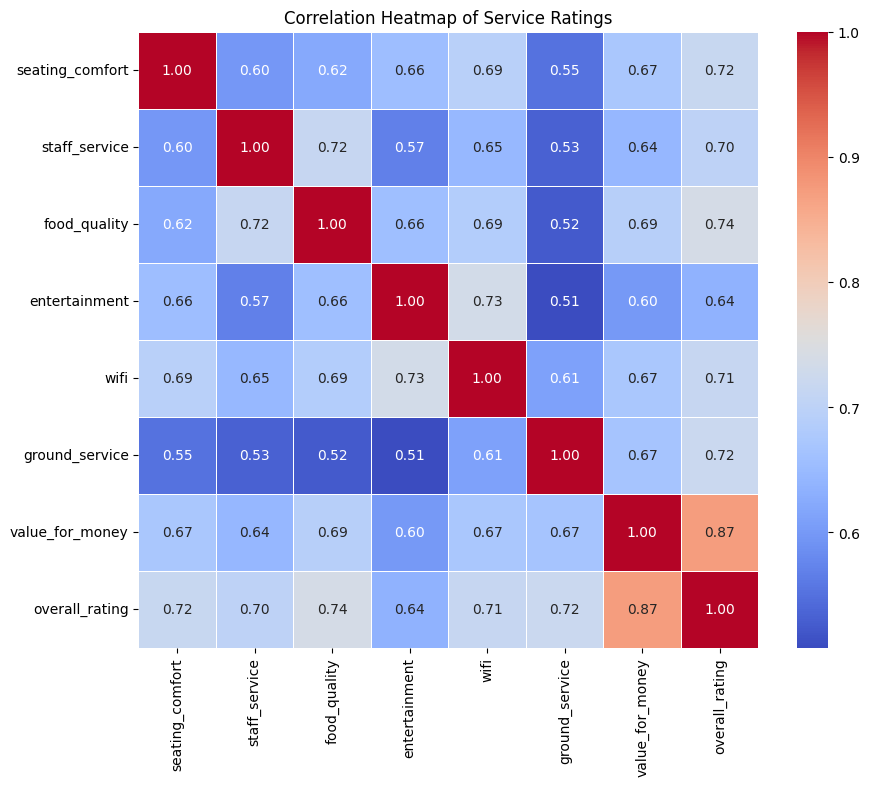

In [115]:
correlation_matrix = data[['seating_comfort', 'staff_service', 'food_quality', 'entertainment', 'wifi', 
                            'ground_service', 'value_for_money', 'overall_rating']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Service Ratings')
plt.show()


Food quality and overall rating have high correlation.

Value for money correlates very high with overall rating.

Ground service has weak correlation with most others.

All rating categories show moderate correlation with each other.

Wifi is correlated with all other ratings.

No big negative correlation.

In [116]:
fig = px.violin(data, 
                x='travel_class', 
                y='seating_comfort', 
                box=True, 
                title='Seating Comfort Distribution by Travel Class',
                labels={'seating_comfort': 'Seating Comfort', 'travel_class': 'Travel Class'})

fig.show()


First class has highest median rating.

Economy class has lower ratings.

Business and premium economy are similar.

First class has less variability.

Economy has most variability.

Some ratings are as low as '1' on each class.

Most ratings are between 2 and 5.

In [117]:
fig = px.histogram(data, 
                   x='seating_comfort', 
                   color='travel_class', 
                   title='Distribution of Seating Comfort Ratings',
                   labels={'seating_comfort': 'Seating Comfort'})

fig.show()


Rating 1 has most reviews.

Rating 3 has the second most reviews.

Economy has many reviews with low ratings

In [118]:
fig = px.treemap(data, 
                 path=['route', 'travel_class'], 
                 title='Travel Class Distribution by Route')

fig.show()


First column shows fewer reviews and more travel class variety

Later columns show more reviews and more colors in the route.

Some routes have mostly one travel class.

Some routes have a variety of travel classes.

The last column has the most reviews.

Each column has different variety of colors and square counts

In [119]:
bins = [0, 2, 4, 6, 8, 10]
labels = ['Very Dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very Satisfied']
data['satisfaction'] = pd.cut(data['overall_rating'], bins=bins, labels=labels)

fig = px.bar(data['satisfaction'].value_counts(), title="Passenger Satisfaction Distribution")
fig.show()


### No need to explain

_____________________________________________________________________________________________________________________________________

# 4- SUMMARY AND ADVICES FOR THE BUSSINESS 



### Key Findings:

#### 1. Service Performance:

*   **Strengths:**
    *   **Staff Service:**  Relatively strong compared to other service aspects.
*   **Weaknesses:**
    *   **Wi-Fi:** Consistently receives the lowest ratings across all travel classes.
    *   **Food Quality:** Below-average satisfaction, with a low median.
    *   **Entertainment:** Limited satisfaction, with ratings concentrated in the lower quartiles.
    *   **Value for Money:** Passengers frequently feel the service doesn't justify the cost.
*   **Overall Rating:**
    *   Mixed and polarized feedback. Many passengers give extremely low (0) or high (7-10) ratings, with few in the mid-range. This indicates a need to address the drivers of both extremes.

#### 2. Passenger Segmentation:

*   **Travel Class:**
    *   **Economy Class:** Highest volume of travelers but lowest average rating, suggesting a large segment with unmet needs.
    *   **First Class:** Lowest volume but highest average rating, serving as a model for the quality that could be provided in other classes.
    *   **Business & Premium Economy:** Fall in between in both volume and ratings, and should be analyzed individually
*   **Travel Type:**
    *   **Leisure Travel:** Dominates (Couple + Solo), indicating a primary market focus.
    *   **Business and Family Travel:** Account for a smaller, but still important, portion of the passengers.

#### 3. Rating Distributions:

*   **Overall Rating:** Shows a polarized distribution, indicating the need to address both extreme satisfaction and dissatisfaction.
*    **Seating Comfort:** Shows wide variability, indicating a diverse range of passenger experiences, and need to improve average ratings

#### 4. Correlation Analysis:

*   **High Correlation:**
    *   Value for Money and Overall Rating exhibit a strong positive correlation, emphasizing the importance of pricing to match the experience.
    *   Food Quality has a high correlation with overall rating, showing the importance of food.
*   **Moderate Correlation:** Most other service ratings show moderate correlation with each other, suggesting that improvements in one area may positively affect others.
*  **Low Correlation:**
   *   Ground service shows a lower correlation with other service aspects, indicating a need for more independent analysis

#### 5. Other key findings
    * High number of reviews with '1' on both overall rating and value for money.
    * Inconsistencies and ups and downs over time.
     * Some routes tend to have fewer passengers and more variety of classes, other routes the opposite.

### Actionable Business Advice:

1.  **Prioritize Service Improvements:**
    *   **Wi-Fi:** Invest in upgrading Wi-Fi infrastructure to meet passenger expectations for connectivity. This is the most critical area for immediate improvement.
    *   **Food Quality:** Conduct market research to understand passenger preferences and invest in improving the variety and quality of food offerings.
    *   **Entertainment:** Enhance the selection of entertainment options, including movies, music, and potentially games, ensuring there's something for all passengers.
2.  **Re-evaluate "Value for Money":**
    *   Analyze pricing strategies across different travel classes to ensure passengers feel they are receiving good value.
    *   Consider providing enhanced services or amenities to justify pricing.
3.  **Address Customer Feedback Polarization:**
    *   Investigate the causes of extreme customer feedback (both negative and positive).
    *   Use this information to fine-tune service offerings and create more consistently positive experiences.
4.  **Tailor Strategies for Different Segments:**
    *   **Economy Class:** Focus on raising the overall experience for the largest customer base, addressing pain points.
    *   **First Class:** Leverage the high ratings to understand what contributes to passenger satisfaction, applying to other classes.
     *   **Business and Premium Economy:** Analyze each segment separately to see how to improve the service for each.
    *  **Leisure Travelers:** Focus on providing a comfortable experience and great entertainment value.
    *  **Business Travelers:** Prioritize efficiency and convenience.
5.  **Improve Reliability and Consistency:**
    *   Reduce inconsistencies in service to create a more predictable and dependable experience.
    *   Focus on making the service reliable.
6.  **Optimize Seating Comfort:**
    *   Address the variability in seating comfort by gathering customer feedback and explore ways to increase the average rating.
7.  **Ground Service Analysis:**
    *   Analyze why ground service is not so correlated to other categories.
8.  **Further Investigation:**
    *   Investigate routes with lower number of reviews, what can be done there?
    *   Investigate routes that have a variety of travel classes, is that good or bad?

### Key Takeaways:

*   **Focus on the Basics:** Prioritize areas like Wi-Fi, food, and entertainment, which consistently score low.
*   **Understand Your Customers:** Analyze different segments (travel classes, travel types) to provide more personalized experiences.
*   **Strive for Consistency:** Reduce variability to create a reliable and dependable experience.

By addressing these key points, the airline has the potential to significantly enhance customer satisfaction and improve its overall standing.

# 5- MACHINE LEARNING MODELS

## 1- Data Loading and Preprocessing


In [121]:
def load_and_preprocess_data(filepath):
    """Loads data, encodes categorical features, and scales numerical features."""
    data

    label_encoders = {}
    categorical_columns = ['status', 'route','aircraft', 'travel_type', 'travel_class', 'recommended']
    for col in categorical_columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

    X = data.drop(columns=['recommended', 'overall_rating','date','review','month', 'source', 'destination','satisfaction'])
    y = data['recommended']

    return X, y

## 2- Define the Model Pipeline


In [122]:
def create_model_pipeline(model):
    """Creates a pipeline that includes scaling and a model."""
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    return pipeline

## 3- Hyperparameter Tuning with Grid Search and Cross-Validation


In [123]:
def tune_hyperparameters(pipeline, param_grid, X_train, y_train, cv=5):
    """Tunes hyperparameters with GridSearchCV and stratified k-fold cross validation."""

    stratified_kfold = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)

    scorers = {
        'accuracy': 'accuracy',
        'f1_weighted': 'f1_weighted',
        'precision_weighted': 'precision_weighted',
        'recall_weighted': 'recall_weighted',
        'roc_auc': make_scorer(roc_auc_score)
    }

    grid_search = GridSearchCV(
        pipeline, 
        param_grid,
        cv=stratified_kfold,
        scoring=scorers,
        refit='f1_weighted',
        verbose=1,
        return_train_score=True
    )
    grid_search.fit(X_train, y_train)
    return grid_search

## 4- Learning Curve Analysis


In [124]:
def plot_learning_curve(model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy'):
    """Plots a learning curve for the model."""
    
    if isinstance(model, Pipeline):  
        model_name = model.steps[-1][1].__class__.__name__ 
    else:
       model_name = model.__class__.__name__ 
    
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, train_sizes=train_sizes, cv=cv, scoring=scoring, shuffle=True, random_state=42
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(f"Learning Curve for {model_name}")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

## 5- Model Evaluation

In [125]:
def evaluate_model(model, X_test, y_test, model_name):
    """Evaluates the model and prints the classification report and confusion matrix."""

    y_pred = model.predict(X_test)
    report = metrics.classification_report(y_test, y_pred, output_dict=True)
    print(f"\n{model_name} Classification Report")
    print(metrics.classification_report(y_test, y_pred))

    plot_confusion_matrix(y_test, y_pred, model_name, labels=np.unique(y_test))
    return report

def plot_confusion_matrix(y_true, y_pred, model_name, labels):
    """Plots a confusion matrix using Plotly."""
    cm = metrics.confusion_matrix(y_true, y_pred)
    
    fig = go.Figure(data=go.Heatmap(z=cm,
                                   x=labels,
                                   y=labels,
                                   colorscale='Reds',
                                   text=cm,
                                   texttemplate="%{text}",
                                   textfont={"size": 10}))
    
    fig.update_layout(title=f'Confusion Matrix for {model_name}',
                      xaxis_title='Predicted Label',
                      yaxis_title='True Label',
                      )
    fig.show()

## 6- Model Saving


In [126]:
def save_model(model, filepath):
    """Saves the trained model."""
    joblib.dump(model, filepath)
    print(f"Model saved to {filepath}")

## 7- Model Comparison

In [127]:
def compare_models(results):
    """Compares model performance metrics."""
    
    metrics_to_compare = ['accuracy','precision', 'recall', 'f1-score','roc_auc']
    
    fig = make_subplots(rows=3, cols=2, subplot_titles=metrics_to_compare)

    row_counter = 1
    col_counter = 1
    for i,metric in enumerate(metrics_to_compare):

        metric_data = []
        for model_name, report in results.items():
            if metric == 'accuracy':
               metric_data.append(report['accuracy'])
            elif metric == 'roc_auc':
                if 'roc_auc' in report:
                  metric_data.append(report['roc_auc'])
                else:
                   metric_data.append(np.nan)
            else : 
                metric_data.append(report['weighted avg'][metric])

        fig.add_trace(go.Bar(name=metric, x=list(results.keys()),y= metric_data) , row=row_counter, col=col_counter)
        if i ==1:
            col_counter = 1
            row_counter=2
        elif i==3:
          col_counter = 1
          row_counter=3
        else:
            col_counter +=1
    fig.update_layout(title="Model Comparison based on Metrics")
    fig.show()

## 8- Main


===== KNN =====
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters for KNN: {'model__n_neighbors': 9, 'model__p': 1, 'model__weights': 'distance'}


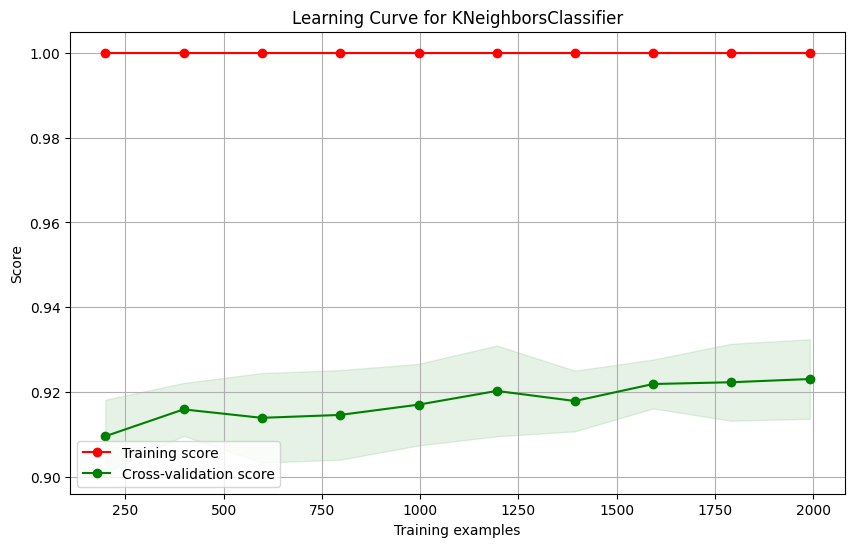


KNN Classification Report
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       402
           1       0.90      0.89      0.89       221

    accuracy                           0.92       623
   macro avg       0.92      0.92      0.92       623
weighted avg       0.92      0.92      0.92       623



Model saved to KNN_model.joblib

===== SVM =====
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for SVM: {'model__C': 0.1, 'model__gamma': 'scale', 'model__kernel': 'rbf'}


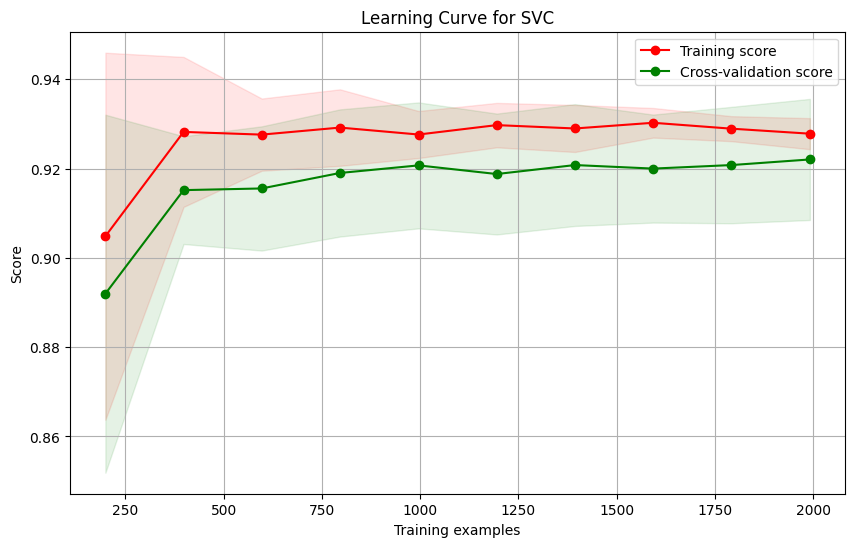


SVM Classification Report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       402
           1       0.93      0.87      0.90       221

    accuracy                           0.93       623
   macro avg       0.93      0.92      0.93       623
weighted avg       0.93      0.93      0.93       623



Model saved to SVM_model.joblib

===== Decision Tree =====
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Decision Tree: {'model__max_depth': 5, 'model__min_samples_leaf': 4, 'model__min_samples_split': 2}


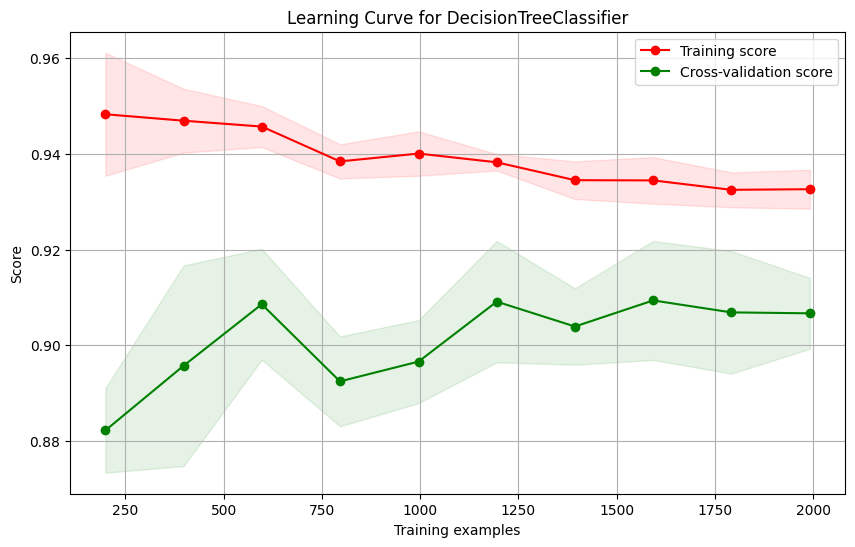


Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       402
           1       0.85      0.87      0.86       221

    accuracy                           0.90       623
   macro avg       0.89      0.89      0.89       623
weighted avg       0.90      0.90      0.90       623



Model saved to Decision_Tree_model.joblib

===== Naive Bayes =====


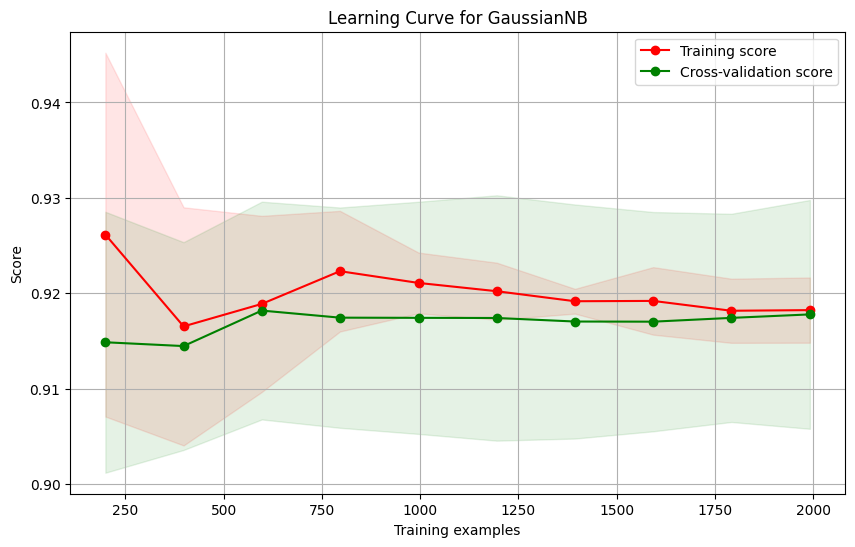


Naive Bayes Classification Report
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       402
           1       0.90      0.90      0.90       221

    accuracy                           0.93       623
   macro avg       0.92      0.92      0.92       623
weighted avg       0.93      0.93      0.93       623



Model saved to Naive_Bayes_model.joblib


In [128]:
X, y = load_and_preprocess_data(data) # Replace with your data path
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

models = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'model__n_neighbors': [3, 5, 7, 9],
                      'model__weights': ['uniform', 'distance'],
                      'model__p': [1, 2]} #1 for manhattan and 2 for euclidean
    },
    'SVM': {
        'model': SVC(random_state=42),
        'param_grid': {'model__kernel': ['linear', 'rbf'],
                       'model__C': [0.1, 1, 10],
                       'model__gamma': ['scale', 'auto']}
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'param_grid': {'model__max_depth': [3, 5, 7, None],
                       'model__min_samples_split': [2, 5, 10],
                       'model__min_samples_leaf': [1, 2, 4]}
    },
    'Naive Bayes':{
        'model': GaussianNB(),
        'param_grid': {}  # no hyperparameters to tune for GaussianNB
    },
}

results = {} 
for model_name, model_config in models.items():
    print(f"\n===== {model_name} =====")
    pipeline = create_model_pipeline(model_config['model'])
    if model_config['param_grid']: 
      tuned_model = tune_hyperparameters(pipeline, model_config['param_grid'], X_train, y_train)
      best_model=tuned_model.best_estimator_
      print(f"Best parameters for {model_name}: {tuned_model.best_params_}")
      plot_learning_curve(best_model, X_train, y_train, scoring='f1_weighted')

    else:
      best_model=pipeline.fit(X_train,y_train)
      plot_learning_curve(best_model, X_train, y_train, scoring='f1_weighted')

    report = evaluate_model(best_model, X_test, y_test, model_name)
    results[model_name] = report
    save_model(best_model, f'{model_name.replace(" ","_")}_model.joblib')
    
compare_models(results)

# 6- Sentiment Analysis using the review 

In [131]:
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('punkt')
    nltk.download('stopwords')

analyzer = SentimentIntensityAnalyzer()

def preprocess_and_tokenize(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
    return ' '.join(tokens)

def handle_negations(text):
    negations = ["not", "never", "no", "nothing", "nowhere", "none", "neither", "nor"]
    words = text.split()
    negated = False
    processed_text = []
    
    for word in words:
        if word in negations:
            negated = True
        elif negated and word not in stopwords.words('english'):
            processed_text.append(f"not_{word}")
            negated = False
        else:
            processed_text.append(word)
    
    return ' '.join(processed_text)

def calculate_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    score = sentiment['compound']
    
    if score > 0.05:
        polarity = 'Positive'
    elif score < -0.05:
        polarity = 'Negative'
    else:
        polarity = 'Neutral'
    
    return score, polarity

def predict_sentiment(new_review):
    processed_review = preprocess_and_tokenize(new_review)
    processed_review_with_negations = handle_negations(processed_review)
    score, polarity = calculate_sentiment(processed_review_with_negations)

    return {
        "processed_review": processed_review_with_negations,
        "sentiment_score": score,
        "sentiment_polarity": polarity
    } 
    
df_reviews = data[['review']].copy()

df_reviews[['sentiment_score', 'sentiment_polarity']] = df_reviews['review'].apply(lambda x: pd.Series([predict_sentiment(x)['sentiment_score'], predict_sentiment(x)['sentiment_polarity']]))

df_reviews.head()

,review,sentiment_score,sentiment_polarity
0,This was the first time I flew British Airw...,-0.3415,Negative
1,Pretty good flight but still some small thi...,0.9941,Positive
2,"Check in was fine, but no priority/fast track...",0.9593,Positive
3,British Airways is absolute rubbish. I had to...,-0.6300,Negative
4,The flight time was changed at the last minut...,0.4284,Positive


# 7- British AirLine Review Analyzer WEB APPLICATION

## TO SEE THE WEB APP 
## OPEN TERMINAL 
## 1- ```git clone https://github.com/Mickey-0/Final-Project-DST```
## 2- ```cd Final-Project-DST```
## 3- RUN ```python app.py``` in terminal 